### Problem 1

Using only Table 1 or only Table 2, see if you can identify the education and marital status of a woman from the Philippines (Asian) that is working in “Craft-repair” sector. What if you use both Table 1 and Table 2?

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [228]:
                    ####################### ONLY TABLE 2 #######################
dataset = pd.read_csv('table2.csv')
table2 = dataset.loc[(dataset['occupation'] == 'Craft-repair') & (dataset['sex'] == 'Female') 
                     & (dataset['race'] == 'Asian-Pac-Islander') & (dataset['native-country'] == 'Philippines') ]
print(table2)

       age    occupation                race     sex  capital-gain  \
29431   59  Craft-repair  Asian-Pac-Islander  Female             0   

       capital-loss  hours-per-week native-country income  
29431             0              35    Philippines  <=50K  


In [227]:
                    ####################### ONLY TABLE 1 #######################
dataset = pd.read_csv('table1.csv')
print(dataset.shape)
table1 = dataset.loc[(dataset['occupation'] == 'Craft-repair') & (dataset['sex'] == 'Female') &
                     (dataset['race'] == 'Asian-Pac-Islander') & (dataset['age'] == 59)]
print(table1.shape)
print(table1)

(32561, 7)
(1, 7)
     age    occupation education  education-num      marital-status  \
920   59  Craft-repair   Masters             14  Married-civ-spouse   

                   race     sex  
920  Asian-Pac-Islander  Female  


I was not able to use only table 1 or table 2 to identify the education and marital-status of a woman from the Philippines (Asian) that is working in “Craft-repair” sector. However by using both table 1 and table 2 I was able to find out the the marital-status of this women is <b>Married-civ-spouse</b>, the education-num is <b>14</b> and the education is <b>Masters</b>. By using the given information and scanning table 2 I was able to find one entry that matched, but table 1 did not have marital status or education. Using the information from the 1 entry returned from table 2 I was able to find both the marital status and education from table 1. 

### Problem 2

Experimenting with **k-anomity, i-diversity, and t-closeness**. 

Consider a dataset, for example, with 3 ordinary attributes and 1 sensitive attribute. Let the 3 ordinary attributes be Age, Sex, and Education and the sensitive attribute be Income, each row in this dataset is of the form:

$$
    [Age, Sex, Education, Income]
$$

A hacker is interested in knowing the sensitive attribute Income. When the dataset is designed so that if complies with either **k-anomity**, **i-diversity**, and/or **t-closeness**, even if he or she somehow figures out the values of the three, the hacker may not retrive the sensitive information accurately. In general, **k-anomity** is weaker than **i-diversity**, which, in turn, is weaker than **t-closeness**.

By definition, **k-anomity** means that there is at least **k** different rows in the table of which ordinary values are a particular combination of Age, Sex, and Education. For example, the hacker knows the information of the person of interest is Age = 31, Sex = Female, and Education = BS. He or she looks into the data table and found that there are 3 rows with that combination:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=70k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

The hacker cannot tell accurately what the income of the person is because it can be one of the 3 values shown. This particular combination of information has 3-anomity. If every combination corresponds to at least 3 rows, then the dataset has 3-anomity.

a) Let's look at the dataset **"table3.csv"**, a simplified version of **"table1.csv"** from problem 1. Let the sensitive attribute be **education** and others be ordinary attributes. Calculate the anomity of the dataset (the value **k**). First, find all the posible combinations of the ordinary attributes that exists in the dataset. After that, determine the anomity for each combination. The anomity of the dataset is the smallest anomity among the combinations.

In [229]:
dataset = pd.read_csv('table3.csv')
SF = dataset.iloc[:,2].values # education

age = range(0, 101) # age: 0-32560
sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
smallestAnon = 10000000000
for r in race:
    for s in sex:
        for a in age:
            table = dataset[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'] == a)]
            if(len(table) != 0):
                if(len(table) < smallestAnon):
                    smallestAnon = len(table)
print("Anomity of the dataset(k-anomity): ",smallestAnon)

Anomity of the dataset(k-anomity):  1


In [240]:
# education = ['Bachelors', 'HS-grad','11th','9th','Masters','Doctorate','Some-college','Assoc-voc','5th-6th','7th-8th'
#             ,'1st-4th','Prof-school','10th','12th','Assoc-acdm','Preschool']

# for i in SF: 
#     if i not in education:
#         print(i)

We can improve the **k-anomity** of the dataset by "suppressing" the ordinary attributes. Suppressing means reducing the resolution of the attribute's value. For this problem, let's suppress Age by replacing the exact age with an age range. For example, instead of leaving age = 32, replace it with age = 30-40. Apply this to **"table3.csv"** with the ranges {<20, 20-30, 30-50, >50}. Check if the anomity improves. 

In [232]:
sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
smallestAnon = 10000000000
for r in race:
    for s in sex:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(0, 20))]
            if(len(table) != 0):
                if(len(table) < smallestAnon):
                    smallestAnon = len(table)
print("Anomity of the dataset(k-anomity) range: 0-20  ",smallestAnon)

sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
smallestAnon = 10000000000
for r in race:
    for s in sex:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(20, 30))]
            if(len(table) != 0):
                if(len(table) < smallestAnon):
                    smallestAnon = len(table)
print("Anomity of the dataset(k-anomity) range: 20-30 ",smallestAnon)

sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
smallestAnon = 10000000000
for r in race:
    for s in sex:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(30, 50))]
            if(len(table) != 0):
                if(len(table) < smallestAnon):
                    smallestAnon = len(table)
print("Anomity of the dataset(k-anomity) range: 30-50 ",smallestAnon)


sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
smallestAnon = 10000000000
for r in race:
    for s in sex:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(0, 50))]
            if(len(table) != 0):
                if(len(table) < smallestAnon):
                    smallestAnon = len(table)
print("Anomity of the dataset(k-anomity) range: 0-50  ",smallestAnon)

Anomity of the dataset(k-anomity) range: 0-20   7
Anomity of the dataset(k-anomity) range: 20-30  34
Anomity of the dataset(k-anomity) range: 30-50  43
Anomity of the dataset(k-anomity) range: 0-50   100


**K-anomity** is nice, however, it fails in many cases. If the rows which share a combination of ordinary attributes have only a few values for the sensitive attribute, then it is not much better than having no anomity at all. For example, consider:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

When **k-anomity** fails in the second case, **i-diversity** comes to the rescue. **I-diversity** states that the rows of a particular combination of information must have at least i different values for the sensitive attribute. The above example has 2-diversity, which is not good. 

b) Calculate the diversity of the dataset **"table3.csv"**. Follow similar steps as in part a. 

In [261]:
age = range(0, 100) # age: 0-32560
sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
count = 0
iDiversity = 100000000 
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0
for r in race:
    for s in sex:
        for a in age:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'] == a)]
            if(len(table) != 0):
                SF = table.iloc[:,2].values
                for i in range(len(SF)):
                    if(SF[i] == 'Bachelors' and bachCount != 1):
                        count += 1
                        bachCount += 1
                    elif(SF[i] == 'HS-grad'and hsCount != 1):
                        count += 1
                        hsCount += 1
                    elif(SF[i] == '11th'and eleventhCount != 1):
                        count += 1
                        eleventhCount += 1
                    elif(SF[i] == '9th'and ninCount != 1):
                        count += 1
                        ninCount += 1
                    elif(SF[i] == 'Masters'and masterCount != 1):
                        count += 1
                        masterCount += 1
                    elif(SF[i] == 'Doctorate'and doctCount != 1):
                        count += 1
                        doctCount += 1
                    elif(SF[i] == 'Some-college'and someCount != 1):
                        count += 1
                        someCount += 1
                    elif(SF[i] == 'Assoc-voc'and assocCount != 1):
                        count += 1
                        assocCount += 1
                    elif(SF[i] == '5th-6th'and fifthCount != 1):
                        count += 1
                        fifthCount += 1
                    elif(SF[i] == '7th-8th'and seventhCount != 1):
                        count += 1
                        seventhCount += 1
                    elif(SF[i] == '1st-4th'and firstCount != 1):
                        count += 1
                        firstCount += 1
                    elif(SF[i] == 'Prof-school'and profCount != 1):
                        count += 1
                        profCount += 1
                    elif(SF[i] == '10th'and tenthCount != 1):
                        count += 1
                        tenthCount += 1
                    elif(SF[i] == '12th'and tweCount != 1):
                        count += 1
                        tweCount += 1
                    elif(SF[i] == 'Preschool'and preschoolCount != 1):
                        count += 1
                        preschoolCount += 1                    
                    elif(SF[i] == 'Assoc-acdm'and assocAdCount != 1):
                        count += 1
                        assocAdCount += 1  
                if(count < iDiversity ):
                    iDiversity = count 
                count = 0 
                bachCount = 0
                hsCount = 0
                eleventhCount = 0
                ninCount = 0
                masterCount = 0
                doctCount = 0
                someCount = 0
                assocCount = 0
                fifthCount = 0
                seventhCount = 0
                firstCount = 0
                profCount = 0
                tenthCount = 0
                tweCount = 0
                assocAdCount = 0 
                preschoolCount = 0
print("Diversity of the dataset(I-diversity): ",iDiversity)

Diversity of the dataset(I-diversity):  1


Suppressing an attribute can also improve the **i-diversity** of the dataset. Repeat the suppression as in **part a** and check if the diversity improves. If it does not, consider further suppress age by using the range {<20, 20-50, >50}.

In [266]:
sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
count = 0
iDiversity = 100000000 
count = 0 
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0
for r in race:
    for s in sex:
        for a in age:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(0, 20))]
            if(len(table) != 0):
                SF = table.iloc[:,2].values
                for i in range(len(SF)):
                    if(SF[i] == 'Bachelors' and bachCount != 1):
                        count += 1
                        bachCount += 1
                    elif(SF[i] == 'HS-grad'and hsCount != 1):
                        count += 1
                        hsCount += 1
                    elif(SF[i] == '11th'and eleventhCount != 1):
                        count += 1
                        eleventhCount += 1
                    elif(SF[i] == '9th'and ninCount != 1):
                        count += 1
                        ninCount += 1
                    elif(SF[i] == 'Masters'and masterCount != 1):
                        count += 1
                        masterCount += 1
                    elif(SF[i] == 'Doctorate'and doctCount != 1):
                        count += 1
                        doctCount += 1
                    elif(SF[i] == 'Some-college'and someCount != 1):
                        count += 1
                        someCount += 1
                    elif(SF[i] == 'Assoc-voc'and assocCount != 1):
                        count += 1
                        assocCount += 1
                    elif(SF[i] == '5th-6th'and fifthCount != 1):
                        count += 1
                        fifthCount += 1
                    elif(SF[i] == '7th-8th'and seventhCount != 1):
                        count += 1
                        seventhCount += 1
                    elif(SF[i] == '1st-4th'and firstCount != 1):
                        count += 1
                        firstCount += 1
                    elif(SF[i] == 'Prof-school'and profCount != 1):
                        count += 1
                        profCount += 1
                    elif(SF[i] == '10th'and tenthCount != 1):
                        count += 1
                        tenthCount += 1
                    elif(SF[i] == '12th'and tweCount != 1):
                        count += 1
                        tweCount += 1
                    elif(SF[i] == 'Preschool'and preschoolCount != 1):
                        count += 1
                        preschoolCount += 1                    
                    elif(SF[i] == 'Assoc-acdm'and assocAdCount != 1):
                        count += 1
                        assocAdCount += 1  
                if(count < iDiversity ):
                    iDiversity = count 
                count = 0 
                bachCount = 0
                hsCount = 0
                eleventhCount = 0
                ninCount = 0
                masterCount = 0
                doctCount = 0
                someCount = 0
                assocCount = 0
                fifthCount = 0
                seventhCount = 0
                firstCount = 0
                profCount = 0
                tenthCount = 0
                tweCount = 0
                assocAdCount = 0 
                preschoolCount = 0
print("Diversity of the dataset(I-diversity) range: 0-20:   ",iDiversity)



sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
count = 0
iDiversity = 100000000 
count = 0 
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0

for r in race:
    for s in sex:
        for a in age:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(20, 30))]
            if(len(table) != 0):
                SF = table.iloc[:,2].values
                for i in range(len(SF)):
                    if(SF[i] == 'Bachelors' and bachCount != 1):
                        count += 1
                        bachCount += 1
                    elif(SF[i] == 'HS-grad'and hsCount != 1):
                        count += 1
                        hsCount += 1
                    elif(SF[i] == '11th'and eleventhCount != 1):
                        count += 1
                        eleventhCount += 1
                    elif(SF[i] == '9th'and ninCount != 1):
                        count += 1
                        ninCount += 1
                    elif(SF[i] == 'Masters'and masterCount != 1):
                        count += 1
                        masterCount += 1
                    elif(SF[i] == 'Doctorate'and doctCount != 1):
                        count += 1
                        doctCount += 1
                    elif(SF[i] == 'Some-college'and someCount != 1):
                        count += 1
                        someCount += 1
                    elif(SF[i] == 'Assoc-voc'and assocCount != 1):
                        count += 1
                        assocCount += 1
                    elif(SF[i] == '5th-6th'and fifthCount != 1):
                        count += 1
                        fifthCount += 1
                    elif(SF[i] == '7th-8th'and seventhCount != 1):
                        count += 1
                        seventhCount += 1
                    elif(SF[i] == '1st-4th'and firstCount != 1):
                        count += 1
                        firstCount += 1
                    elif(SF[i] == 'Prof-school'and profCount != 1):
                        count += 1
                        profCount += 1
                    elif(SF[i] == '10th'and tenthCount != 1):
                        count += 1
                        tenthCount += 1
                    elif(SF[i] == '12th'and tweCount != 1):
                        count += 1
                        tweCount += 1
                    elif(SF[i] == 'Preschool'and preschoolCount != 1):
                        count += 1
                        preschoolCount += 1                    
                    elif(SF[i] == 'Assoc-acdm'and assocAdCount != 1):
                        count += 1
                        assocAdCount += 1  
                if(count < iDiversity ):
                    iDiversity = count 
                count = 0 
                bachCount = 0
                hsCount = 0
                eleventhCount = 0
                ninCount = 0
                masterCount = 0
                doctCount = 0
                someCount = 0
                assocCount = 0
                fifthCount = 0
                seventhCount = 0
                firstCount = 0
                profCount = 0
                tenthCount = 0
                tweCount = 0
                assocAdCount = 0 
                preschoolCount = 0
print("Diversity of the dataset(I-diversity) range: 20-30:  ",iDiversity)


sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
count = 0
iDiversity = 100000000 
count = 0 
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0
for r in race:
    for s in sex:
        for a in age:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(30, 50))]
            if(len(table) != 0):
                SF = table.iloc[:,2].values
                for i in range(len(SF)):
                    if(SF[i] == 'Bachelors' and bachCount != 1):
                        count += 1
                        bachCount += 1
                    elif(SF[i] == 'HS-grad'and hsCount != 1):
                        count += 1
                        hsCount += 1
                    elif(SF[i] == '11th'and eleventhCount != 1):
                        count += 1
                        eleventhCount += 1
                    elif(SF[i] == '9th'and ninCount != 1):
                        count += 1
                        ninCount += 1
                    elif(SF[i] == 'Masters'and masterCount != 1):
                        count += 1
                        masterCount += 1
                    elif(SF[i] == 'Doctorate'and doctCount != 1):
                        count += 1
                        doctCount += 1
                    elif(SF[i] == 'Some-college'and someCount != 1):
                        count += 1
                        someCount += 1
                    elif(SF[i] == 'Assoc-voc'and assocCount != 1):
                        count += 1
                        assocCount += 1
                    elif(SF[i] == '5th-6th'and fifthCount != 1):
                        count += 1
                        fifthCount += 1
                    elif(SF[i] == '7th-8th'and seventhCount != 1):
                        count += 1
                        seventhCount += 1
                    elif(SF[i] == '1st-4th'and firstCount != 1):
                        count += 1
                        firstCount += 1
                    elif(SF[i] == 'Prof-school'and profCount != 1):
                        count += 1
                        profCount += 1
                    elif(SF[i] == '10th'and tenthCount != 1):
                        count += 1
                        tenthCount += 1
                    elif(SF[i] == '12th'and tweCount != 1):
                        count += 1
                        tweCount += 1
                    elif(SF[i] == 'Preschool'and preschoolCount != 1):
                        count += 1
                        preschoolCount += 1                    
                    elif(SF[i] == 'Assoc-acdm'and assocAdCount != 1):
                        count += 1
                        assocAdCount += 1  
                if(count < iDiversity ):
                    iDiversity = count 
                count = 0 
                bachCount = 0
                hsCount = 0
                eleventhCount = 0
                ninCount = 0
                masterCount = 0
                doctCount = 0
                someCount = 0
                assocCount = 0
                fifthCount = 0
                seventhCount = 0
                firstCount = 0
                profCount = 0
                tenthCount = 0
                tweCount = 0
                assocAdCount = 0 
                preschoolCount = 0
print("Diversity of the dataset(I-diversity) range: 30-50:  ",iDiversity)


sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
count = 0
iDiversity = 100000000 
count = 0 
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0
for r in race:
    for s in sex:
        for a in age:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(20, 50))]
            if(len(table) != 0):
                SF = table.iloc[:,2].values
                for i in range(len(SF)):
                    if(SF[i] == 'Bachelors' and bachCount != 1):
                        count += 1
                        bachCount += 1
                    elif(SF[i] == 'HS-grad'and hsCount != 1):
                        count += 1
                        hsCount += 1
                    elif(SF[i] == '11th'and eleventhCount != 1):
                        count += 1
                        eleventhCount += 1
                    elif(SF[i] == '9th'and ninCount != 1):
                        count += 1
                        ninCount += 1
                    elif(SF[i] == 'Masters'and masterCount != 1):
                        count += 1
                        masterCount += 1
                    elif(SF[i] == 'Doctorate'and doctCount != 1):
                        count += 1
                        doctCount += 1
                    elif(SF[i] == 'Some-college'and someCount != 1):
                        count += 1
                        someCount += 1
                    elif(SF[i] == 'Assoc-voc'and assocCount != 1):
                        count += 1
                        assocCount += 1
                    elif(SF[i] == '5th-6th'and fifthCount != 1):
                        count += 1
                        fifthCount += 1
                    elif(SF[i] == '7th-8th'and seventhCount != 1):
                        count += 1
                        seventhCount += 1
                    elif(SF[i] == '1st-4th'and firstCount != 1):
                        count += 1
                        firstCount += 1
                    elif(SF[i] == 'Prof-school'and profCount != 1):
                        count += 1
                        profCount += 1
                    elif(SF[i] == '10th'and tenthCount != 1):
                        count += 1
                        tenthCount += 1
                    elif(SF[i] == '12th'and tweCount != 1):
                        count += 1
                        tweCount += 1
                    elif(SF[i] == 'Preschool'and preschoolCount != 1):
                        count += 1
                        preschoolCount += 1                    
                    elif(SF[i] == 'Assoc-acdm'and assocAdCount != 1):
                        count += 1
                        assocAdCount += 1  
                if(count < iDiversity ):
                    iDiversity = count 
                count = 0 
                bachCount = 0
                hsCount = 0
                eleventhCount = 0
                ninCount = 0
                masterCount = 0
                doctCount = 0
                someCount = 0
                assocCount = 0
                fifthCount = 0
                seventhCount = 0
                firstCount = 0
                profCount = 0
                tenthCount = 0
                tweCount = 0
                assocAdCount = 0 
                preschoolCount = 0
print("Diversity of the dataset(I-diversity) range: 20-50:  ",iDiversity)

sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
count = 0
iDiversity = 100000000 
count = 0 
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0 

for r in race:
    for s in sex:
        for a in age:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'].between(0, 50))]
            if(len(table) != 0):
                SF = table.iloc[:,2].values
                for i in range(len(SF)):
                    if(SF[i] == 'Bachelors' and bachCount != 1):
                        count += 1
                        bachCount += 1
                    elif(SF[i] == 'HS-grad'and hsCount != 1):
                        count += 1
                        hsCount += 1
                    elif(SF[i] == '11th'and eleventhCount != 1):
                        count += 1
                        eleventhCount += 1
                    elif(SF[i] == '9th'and ninCount != 1):
                        count += 1
                        ninCount += 1
                    elif(SF[i] == 'Masters'and masterCount != 1):
                        count += 1
                        masterCount += 1
                    elif(SF[i] == 'Doctorate'and doctCount != 1):
                        count += 1
                        doctCount += 1
                    elif(SF[i] == 'Some-college'and someCount != 1):
                        count += 1
                        someCount += 1
                    elif(SF[i] == 'Assoc-voc'and assocCount != 1):
                        count += 1
                        assocCount += 1
                    elif(SF[i] == '5th-6th'and fifthCount != 1):
                        count += 1
                        fifthCount += 1
                    elif(SF[i] == '7th-8th'and seventhCount != 1):
                        count += 1
                        seventhCount += 1
                    elif(SF[i] == '1st-4th'and firstCount != 1):
                        count += 1
                        firstCount += 1
                    elif(SF[i] == 'Prof-school'and profCount != 1):
                        count += 1
                        profCount += 1
                    elif(SF[i] == '10th'and tenthCount != 1):
                        count += 1
                        tenthCount += 1
                    elif(SF[i] == '12th'and tweCount != 1):
                        count += 1
                        tweCount += 1
                    elif(SF[i] == 'Preschool'and preschoolCount != 1):
                        count += 1
                        preschoolCount += 1                    
                    elif(SF[i] == 'Assoc-acdm'and assocAdCount != 1):
                        count += 1
                        assocAdCount += 1  
                if(count < iDiversity ):
                    iDiversity = count 
                count = 0 
                bachCount = 0
                hsCount = 0
                eleventhCount = 0
                ninCount = 0
                masterCount = 0
                doctCount = 0
                someCount = 0
                assocCount = 0
                fifthCount = 0
                seventhCount = 0
                firstCount = 0
                profCount = 0
                tenthCount = 0
                tweCount = 0
                assocAdCount = 0 
                preschoolCount = 0
print("Diversity of the dataset(I-diversity) range: 0-50:   ",iDiversity)

Diversity of the dataset(I-diversity) range: 0-20:    4
Diversity of the dataset(I-diversity) range: 20-30:   7
Diversity of the dataset(I-diversity) range: 30-50:   11
Diversity of the dataset(I-diversity) range: 20-50:   11
Diversity of the dataset(I-diversity) range: 0-50:    12


**T-closeness** is even better than **i-diversity**. **T-closeness** requires that for every combination of information, the distribution of the sensitive attribute's value among the corresponding rows must be close to the overall distribution of the sensitive attribute's value for the whole dataset. Distance between distribution is calculated using the Earth Mover Distance (EMD). The dataset has **t-closeness** if no distance exceeds **t**. 

c) Calculate the overall distribution of **education**. Find the **t-closeness** of the dataset (largest distance between any combination's distribution of marital-status and the overall distribution).

You can use **scipy.stats.wasserstein_distance** to calculate the EMD.

In [268]:
from scipy.stats import wasserstein_distance
dataset = pd.read_csv('table3.csv')
SF = dataset.iloc[:,2].values # education
t_closeness = 0
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0
for i in range(len(SF)):
    if(SF[i] == 'Bachelors'):
        bachCount += 1
    elif(SF[i] == 'HS-grad'):
        hsCount += 1
    elif(SF[i] == '11th'):
        eleventhCount += 1
    elif(SF[i] == '9th'):
        ninCount += 1
    elif(SF[i] == 'Masters'):
        masterCount += 1
    elif(SF[i] == 'Doctorate'):
        doctCount += 1
    elif(SF[i] == 'Some-college'):
        someCount += 1
    elif(SF[i] == 'Assoc-voc'):
        assocCount += 1
    elif(SF[i] == '5th-6th'):
        fifthCount += 1
    elif(SF[i] == '7th-8th'):
        seventhCount += 1
    elif(SF[i] == '1st-4th'):
        firstCount += 1
    elif(SF[i] == 'Prof-school'):
        profCount += 1
    elif(SF[i] == '10th'):
        tenthCount += 1
    elif(SF[i] == '12th'):
        tweCount += 1
    elif(SF[i] == 'Preschool'):
        preschoolCount += 1                    
    elif(SF[i] == 'Assoc-acdm'):
        assocAdCount += 1 
overallDistribution = [ bachCount/32561, hsCount/32561,eleventhCount/32561,ninCount/32561, masterCount/32561,
doctCount/32561, someCount/32561 , assocCount/32561 , fifthCount/32561, seventhCount/32561, firstCount/32561,
profCount/32561, tenthCount/32561,tweCount/32561,assocAdCount/32561,preschoolCount/32561]
bachCount = 0
hsCount = 0
eleventhCount = 0
ninCount = 0
masterCount = 0
doctCount = 0
someCount = 0
assocCount = 0
fifthCount = 0
seventhCount = 0
firstCount = 0
profCount = 0
tenthCount = 0
tweCount = 0
assocAdCount = 0 
preschoolCount = 0
age = range(0, 100) 
sex = ['Male', 'Female']
race = ['White', 'Black', 'Asian-Pac-Islander','Amer-Indian-Eskimo', 'Other']
for r in race:
    for s in sex:
        for a in age:
            table = dataset.loc[(dataset['race'] == r) & (dataset['sex'] == s) & (dataset['age'] == a)]
            if(len(table) != 0):
                SF = table.iloc[:,2].values
                for i in range(len(SF)):
                    if(SF[i] == 'Bachelors'):
                        bachCount += 1
                    elif(SF[i] == 'HS-grad'):
                        hsCount += 1
                    elif(SF[i] == '11th'):
                        eleventhCount += 1
                    elif(SF[i] == '9th'):
                        ninCount += 1
                    elif(SF[i] == 'Masters'):
                        masterCount += 1
                    elif(SF[i] == 'Doctorate'):
                        doctCount += 1
                    elif(SF[i] == 'Some-college'):
                        someCount += 1
                    elif(SF[i] == 'Assoc-voc'):
                        assocCount += 1
                    elif(SF[i] == '5th-6th'):
                        fifthCount += 1
                    elif(SF[i] == '7th-8th'):
                        seventhCount += 1
                    elif(SF[i] == '1st-4th'):
                        firstCount += 1
                    elif(SF[i] == 'Prof-school'):
                        profCount += 1
                    elif(SF[i] == '10th'):
                        tenthCount += 1
                    elif(SF[i] == '12th'):
                        tweCount += 1
                    elif(SF[i] == 'Preschool'):
                        preschoolCount += 1                    
                    elif(SF[i] == 'Assoc-acdm'):
                        assocAdCount += 1
                combinationDistribution = [ bachCount/len(table), hsCount/len(table),eleventhCount/len(table),ninCount/len(table), masterCount/len(table),
                    doctCount/len(table), someCount/len(table) , assocCount/len(table) , fifthCount/len(table), seventhCount/len(table), firstCount/len(table),
                    profCount/len(table), tenthCount/len(table),tweCount/len(table),assocAdCount/len(table),preschoolCount/len(table)]
                emd = wasserstein_distance(combinationDistribution, overallDistribution)
                if (emd > t_closeness ):
                    t_closeness = emd 
                bachCount = 0
                hsCount = 0
                eleventhCount = 0
                ninCount = 0
                masterCount = 0
                doctCount = 0
                someCount = 0
                assocCount = 0
                fifthCount = 0
                seventhCount = 0
                firstCount = 0
                profCount = 0
                tenthCount = 0
                tweCount = 0
                assocAdCount = 0 
                preschoolCount = 0

print("Closeness of the dataset(T-closeness)",t_closeness)


Closeness of the dataset(T-closeness) 0.08468720248149628


### Problem 4 

There are 2 regression datasets given to you: "group1.csv" and "group2.csv". Both have 2 attributes and no label. Load them and store them in $X_1$ and $X_2$, respectively. 

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
dataset1 = pd.read_csv('group1.csv')
X1 = dataset1.iloc[:, :-1].values
y1 = dataset1.iloc[:, 1].values

dataset2 = pd.read_csv('group2.csv')
X2 = dataset2.iloc[:, :-1].values
y2 = dataset2.iloc[:, 1].values


a) Run Linear Regression on each of the datasets. Are the coefficients positive or negative? Provide a plot for each dataset. 

Group 1 coefficients:  [0.94091131]
Group 1 intercept   :  3.039383740727105
Group 2 coefficients:  [1.12119228]
Group 2 intercept   :  -4.742667504931767


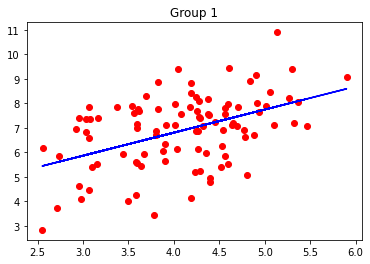

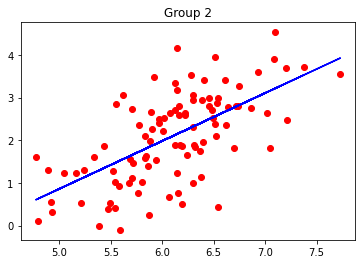

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.1)

regressor_1 = LinearRegression()
regressor_1.fit(X_train_1, y_train_1)
print("Group 1 coefficients: ", regressor_1.coef_)
print("Group 1 intercept   : ", regressor_1.intercept_)


regressor_2 = LinearRegression()
regressor_2.fit(X_train_2, y_train_2)
print("Group 2 coefficients: ", regressor_2.coef_)
print("Group 2 intercept   : ", regressor_2.intercept_)



y_pred_1 = regressor_1.predict(X_test_1)
y_pred_2 = regressor_2.predict(X_test_2)

plt.scatter(X1, y1, color = 'red')
plt.plot(X1, regressor_1.predict(X1), color = 'blue')
plt.title('Group 1')
plt.show()

plt.scatter(X2, y2, color = 'red')
plt.plot(X2, regressor_2.predict(X2), color = 'blue')
plt.title('Group 2')
plt.show()


b) Now combine both datasets into a single large dataset. Call this dataset $X$ ($X=X_1 \cup X_2$). Again, run Linear Regression on the combined dataset $X$. Is the coefficient positive or negative? Provide a plot. 

       0     1     2     3
0   3.65  6.26  7.75  2.30
1   2.56  5.52  6.19  1.28
2   3.58  6.15  4.27  0.76
3   4.56  5.94  7.82  1.54
4   3.03  6.30  7.36  1.01
..   ...   ...   ...   ...
95  4.37  6.86  8.18  2.75
96  3.80  4.93  6.70  0.33
97  4.80  6.54  5.07  3.00
98  3.78  5.38  3.44  0.00
99  5.32  5.88  7.20  1.98

[100 rows x 4 columns]
Combined coefficients:  [[0.8691781]]
Combined intercept   :  [3.41771927]


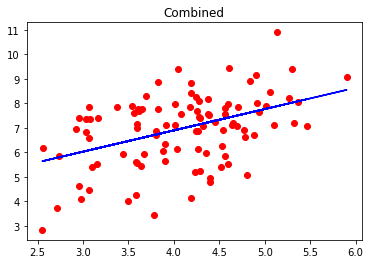

In [135]:
dataset = pd.read_csv('combined.csv',header = None)
print(dataset)
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 2:3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Combined coefficients: ", regressor.coef_)
print("Combined intercept   : ", regressor.intercept_)
y_pred = regressor.predict(X_test)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Combined')
plt.show()

c) What is the name of this illustrated paradox? What do the above results tell us about modeling the relationship between two variables in the presence of a missing attribute? To give you some intuition, imagine there is a third unobserved attribute $Z$ that has different values depending on which group an example belongs to. In other words, every data point in $X_1$ has $Z=1$ and every data point in $X_2$ has $Z=2$. Attribute $Z$ essentially partitions the whole dataset $X$ into 2 subsets $X_1$ and $X_2$.  

The name of this illustrated paradox is Simpson's paradox. The above results tell us that the trend we observe observe when only using a single group, but disappear when combining the groups support the theory of Simpson's paradox. Looking at example given we know we wiil observe different different trends in the data when looking at X1 and X2 separately or looking at them together. 

### Problem 5 

Consider the Causal Graphical Network below: 

a) Are variables W and Z independent?

Variable W is exogenous so it is independent. Variable Z is endogenous so it is dependent

b) Are W and Z conditionally independent given Y

They are not conditionaly independent. Since every path from W to Z is not d-separated or blocked 

c) Are W and Z conditionally independent given X

They are not conditionaly independent. Since every path from W to Z is not d-separated or blocked 

d) Repeat items 1–3 under the condition do(T = 1)

    a) Yes variables W and Z are independent
    b) W and Z are conditionally independent given Y. There is a path from W to Z that is d-separated and not blocked 
    c) W and Z are conditionally independent given X. There is a path from W to Z that is d-separated and not blocked 